<a href="https://colab.research.google.com/github/Hyun-ho-Lee/Python-Practice/blob/main/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EA%B8%B0%EB%B3%B8%EA%B8%B0_08_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Underfitting & Overfitting 
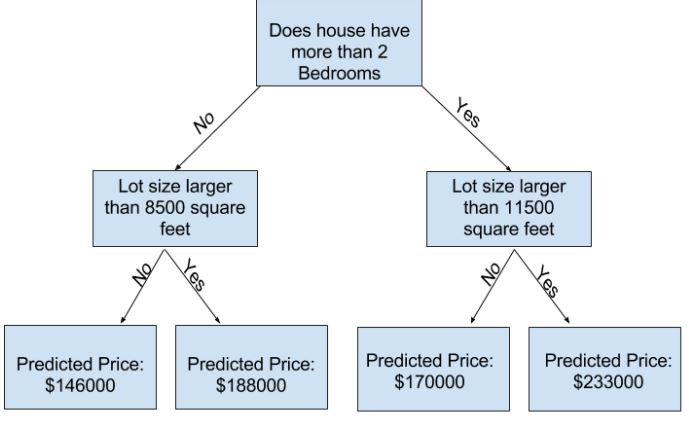

앞의 의사결정 나무에서 집 가격을 예측하는 방법으로 의사결정 나무를 사용하였다. 의사결정 나무는 가지를 계속해서 나아가는 방식인데 만일 가지의 갯수가 무수히 많아지면 어떠한 경우가 발생할까 ? 아마 Overfitting 이 발생한다 왜냐면 train data로 완벽하게 학습을 하여서 test data를 모델에 적응시킬때 극단적인 결과가 발생한다 이러한 현상을 방지해야하는 방법에 대해 생각해보자 


In [1]:
import pandas as pd
import os 
import warnings
warnings.filterwarnings('ignore')
from google.colab import drive
drive.mount('/content/drvie')
melbourne_data=pd.read_csv("/content/drvie/MyDrive/melb_data.csv")

Mounted at /content/drvie


In [5]:
 # Filter rows with missing values
filtered_melbourne_data = melbourne_data.dropna(axis=0)
# Choose target and features
y = filtered_melbourne_data.Price
melbourne_features = ['Rooms', 'Bathroom', 'Landsize', 'BuildingArea', 
                        'YearBuilt', 'Lattitude', 'Longtitude']
X = filtered_melbourne_data[melbourne_features]

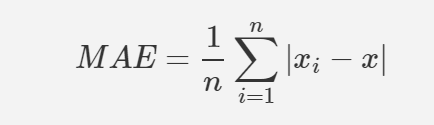 

MAE 에 대한 공식 MSE 와 MAE에 대해 조만간 따로 정리

In [15]:
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

def get_mae(max_leaf_nodes,train_X,val_X,train_y,val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes,random_state=0)
    model.fit(train_X,train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y,preds_val)
    return(mae)

In [13]:
train_X , val_X ,train_y , val_y = train_test_split(X,y,random_state=0)

In [10]:
val_X

,Rooms,Bathroom,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude
4850,2,1.0,96.0,71.0,1880.0,-37.85010,144.99530
2307,2,1.0,0.0,70.0,1965.0,-37.89020,144.99070
10090,2,1.0,136.0,58.0,1892.0,-37.85542,144.99571
3645,3,2.0,205.0,184.0,1995.0,-37.79930,145.02670
4930,2,1.0,400.0,88.0,1955.0,-37.73520,144.98520
...,...,...,...,...,...,...,...
8223,2,1.0,0.0,82.0,2011.0,-37.73240,144.93770
11190,3,2.0,590.0,151.0,1981.0,-37.89628,145.22294
8563,1,1.0,1175.0,35.0,1970.0,-37.78490,144.82720
1867,2,1.0,585.0,97.0,1950.0,-37.87920,145.09480


In [16]:
# compare MAE with differing values of max_leaf_nodes
for max_leaf_nodes in [5, 50, 500, 5000]:
    my_mae = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))

Max leaf nodes: 5  		 Mean Absolute Error:  347380
Max leaf nodes: 50  		 Mean Absolute Error:  258171
Max leaf nodes: 500  		 Mean Absolute Error:  243495
Max leaf nodes: 5000  		 Mean Absolute Error:  254983


leaf nodes가 5000일경우 최적이다 

# Random Forest model

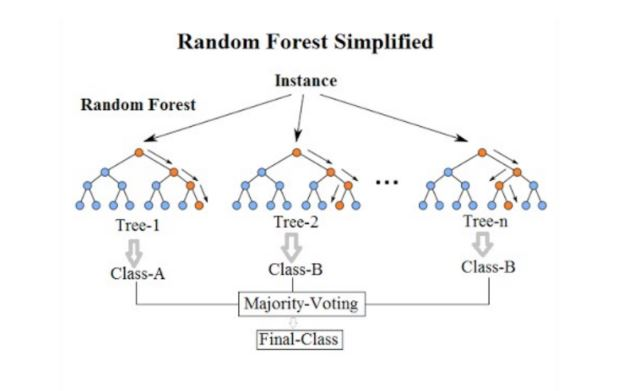

Random Forest 알고리즘은 Decision Tree의 분류보다 정확도를 개선시키기 위해 다수의 나무를 생성하여 각각 나무의 예측을 총 조합하여 결론을 내리는 구조 앙상블 머신러닝 모델의 한가지이며 배깅을 이용해서 데이터 세트를 추출함

In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(train_X,train_y)
melb_preds = forest_model.predict(val_X)
print(mean_absolute_error(val_y,melb_preds)

191669.7536453626


랜덤 포레스트 결과 의사결정나무보다 낮은 MAE를 보여줌 무조건적으로 성능이 좋다고 말할수는 없지만 결과론적으로 좋은 성능을 보인다고는 말을 할수 있음